In [23]:
from __future__ import annotations
from flamekit.io_fronts import Case, load_fronts
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Dict, Tuple
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.inspection import permutation_importance

## Input Parameters

In [62]:

BASE_DIR = Path("../data/isocontours")
PHI = 0.40
LAT_SIZE = "100"
TIME_STEP = 211
POST = True

TARGET_VAR = "DW_FDS"
ISOLEVEL = 4.5

# -------------------------
# MISSING SETTINGS (DEFINED)
# -------------------------
CLUSTER_ON_SPATIAL = False  # if True, x,y,z can be included as clustering features

COLS_TO_EXCLUDE = {
    TARGET_VAR,
    "c_iso",
    "cluster",
    "cluster_conf",
    "x",
    "y",
    "z",
    "N2",
    "omega_N2",
    "FDS_src_term",
    "FDS_diffusion_term",
    "FDS_diff_velocity_term",
    "gradT_normal",
    "H2_diffusion_total",
    "O2_diffusion_total",
    "H_diffusion_total",
    "total_heat_conduction",
    "u",
    "v",
    "abs_flame_prop_vel_normal",
    "strain_rate",
    "p"
}

N_CLUSTERS = 5

GMM_PARAMS = dict(
    covariance_type="full",
    reg_covar=1e-6,
    max_iter=300,
    n_init=5,
    random_state=0,
)

MIN_CLUSTER_SAMPLES = 50
TEST_SIZE = 0.25
RANDOM_STATE = 0

MODEL_PARAMS = dict(
    n_estimators=400,
    max_depth=None,
    random_state=RANDOM_STATE,
    n_jobs=-1,
)

TOPN_PRINT = 12
TOPN_HEATMAP = 25


Loaded ISO 4.5: raw n=8824, after clean n=8824
GMM AIC: -1880298.62
GMM BIC: -1862734.34

Cluster summary:
 cluster    n  sd_mean   sd_std  conf_mean     x_mean    y_mean
       0 1664 0.115843 0.406546   0.999657 221.331024 38.167755
       1 2095 0.064185 0.122186   0.999988 284.584473 32.660767
       2 1033 0.982320 0.485671   0.999624 196.787445 42.799984
       3 1919 1.223152 0.094737   0.999482 180.868393 51.760799
       4 2113 0.063948 0.097651   0.999756 284.334717 60.892719


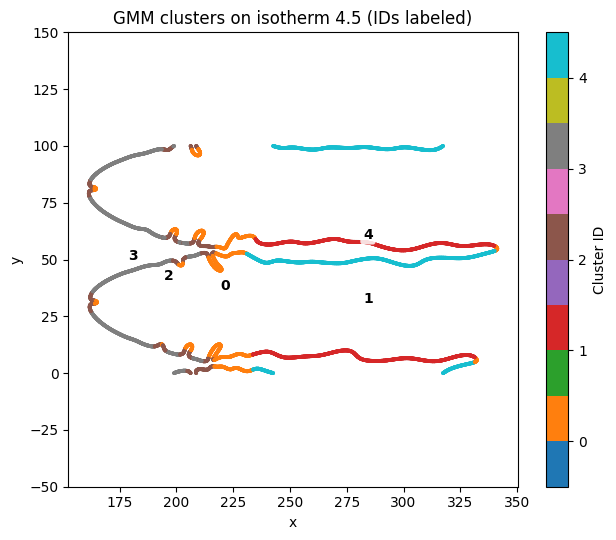


--- Cluster 0 | n=1664 ---
R^2=0.9960 | RMSE=2.563163e-02
Importance method: shap
Top features:
  01. H2O  (2.7069e-01)
  02. stretch_rate  (7.5757e-02)
  03. heat_conduction_normal  (3.5803e-02)
  04. O2  (3.1658e-02)
  05. gradT  (8.3370e-03)
  06. heat_conduction_tangential  (4.0605e-03)
  07. curvature  (3.8185e-03)
  08. normal_strain_rate  (2.8892e-03)
  09. density_ratio_sigma  (2.3367e-03)
  10. vorticity  (2.0301e-03)
  11. omega_O  (1.9326e-03)
  12. tangential_strain_rate  (1.8440e-03)


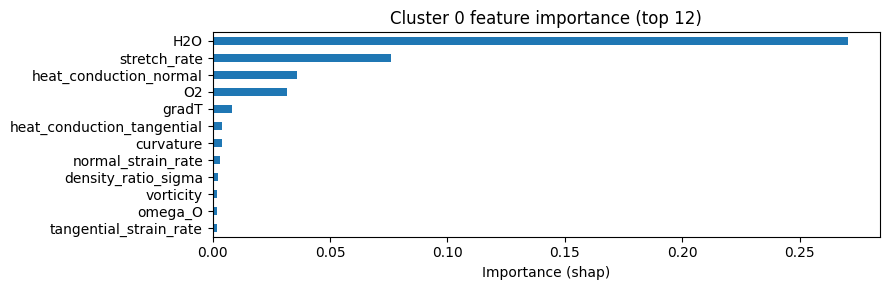


--- Cluster 1 | n=2095 ---
R^2=0.9987 | RMSE=4.485172e-03
Importance method: shap
Top features:
  01. density_ratio_sigma  (5.1972e-02)
  02. heat_conduction_normal  (3.2444e-02)
  03. H2O  (1.1315e-02)
  04. curvature  (5.8131e-03)
  05. heat_conduction_tangential  (3.8645e-03)
  06. tangential_strain_rate  (3.3408e-03)
  07. stretch_rate  (2.5103e-03)
  08. normal_strain_rate  (1.9978e-03)
  09. O2  (1.4204e-03)
  10. flow_velocity_tangential  (1.3188e-03)
  11. gradT  (1.1465e-03)
  12. flow_velocity_normal  (1.0371e-03)


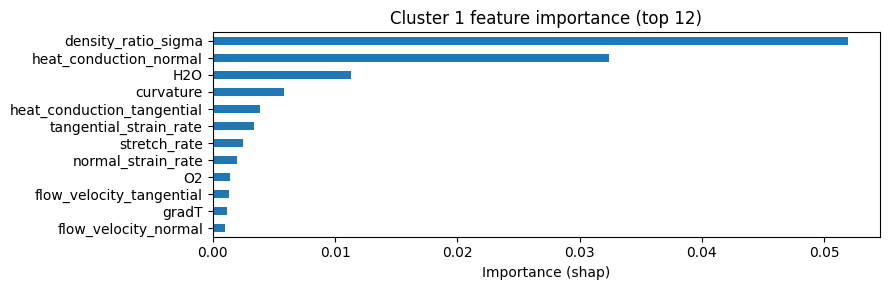


--- Cluster 2 | n=1033 ---
R^2=0.9961 | RMSE=3.055411e-02
Importance method: shap
Top features:
  01. H2O  (3.6609e-01)
  02. H2O2  (1.0209e-01)
  03. omega_H  (2.8340e-02)
  04. heat_conduction_tangential  (1.8628e-02)
  05. curvature  (1.5372e-02)
  06. gradT  (9.2490e-03)
  07. flow_velocity_normal  (6.5550e-03)
  08. stretch_rate  (5.0178e-03)
  09. omega_H2O2  (4.4426e-03)
  10. vorticity  (2.5698e-03)
  11. flow_velocity_tangential  (1.9952e-03)
  12. HO2  (1.5933e-03)


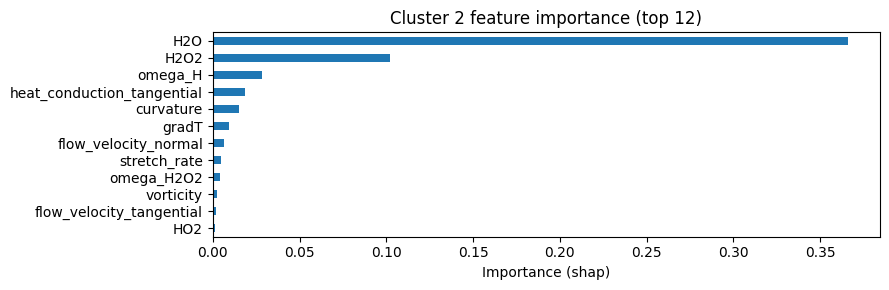


--- Cluster 3 | n=1919 ---
R^2=0.9984 | RMSE=3.872860e-03
Importance method: shap
Top features:
  01. H2O  (2.8294e-02)
  02. density_ratio_sigma  (2.5185e-02)
  03. gradT  (2.4671e-02)
  04. HO2  (3.1852e-03)
  05. H2O2  (1.8737e-03)
  06. HRR  (1.5823e-03)
  07. omega_HO2  (1.3827e-03)
  08. omega_H2  (1.3199e-03)
  09. flow_velocity_normal  (1.0933e-03)
  10. phi_loc  (6.2264e-04)
  11. omega_H2O  (6.0247e-04)
  12. flow_velocity_tangential  (5.7628e-04)


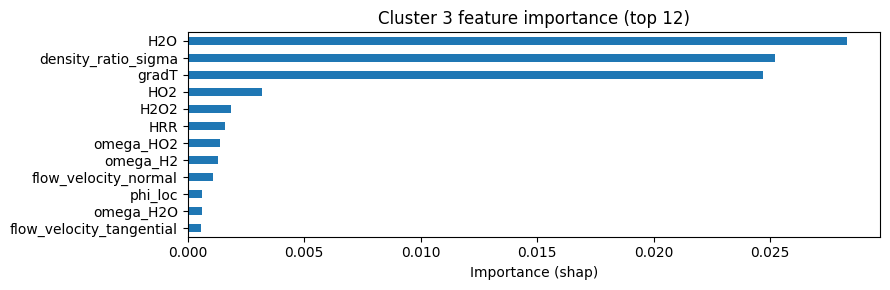


--- Cluster 4 | n=2113 ---
R^2=0.9989 | RMSE=3.282242e-03
Importance method: shap
Top features:
  01. O2  (6.0885e-02)
  02. heat_conduction_normal  (1.5324e-02)
  03. density_ratio_sigma  (1.0609e-02)
  04. H2O  (6.6868e-03)
  05. curvature  (5.4976e-03)
  06. stretch_rate  (4.2079e-03)
  07. tangential_strain_rate  (2.5140e-03)
  08. heat_conduction_tangential  (2.1454e-03)
  09. flow_velocity_tangential  (8.2049e-04)
  10. flow_velocity_normal  (7.5752e-04)
  11. normal_strain_rate  (6.7331e-04)
  12. gradT  (5.4509e-04)


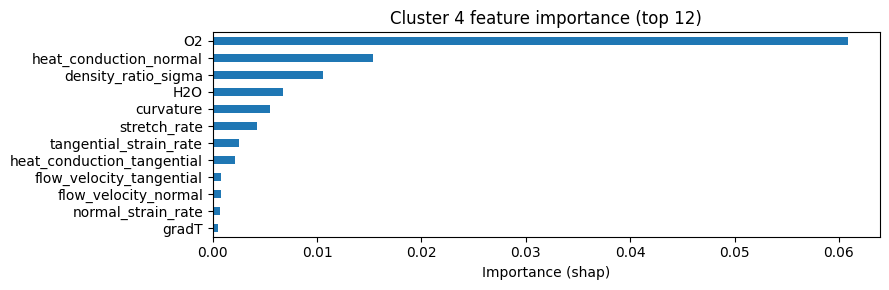


Per-cluster model metrics:
 cluster    n       r2     rmse importance_method
       0 1664 0.996019 0.025632              shap
       1 2095 0.998662 0.004485              shap
       2 1033 0.996137 0.030554              shap
       3 1919 0.998393 0.003873              shap
       4 2113 0.998900 0.003282              shap


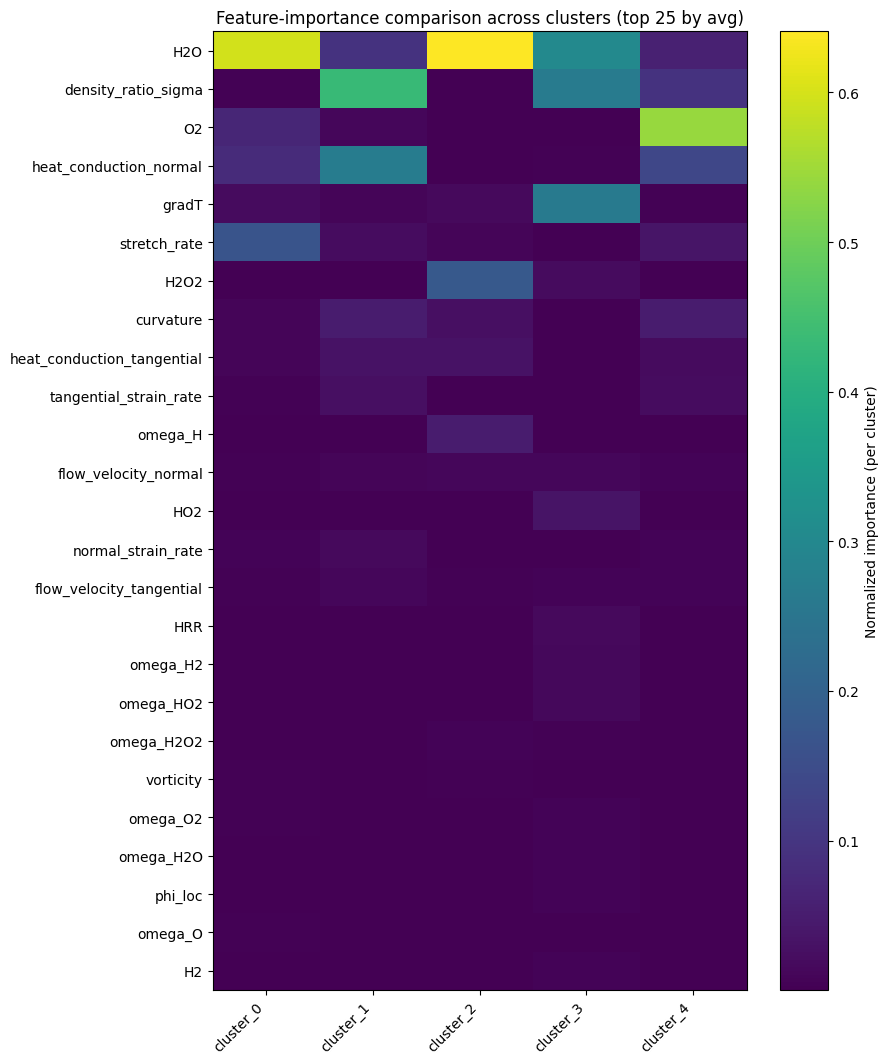


Top features (normalized importance per cluster):
                            cluster_0  cluster_1  cluster_2  cluster_3  cluster_4
H2O                            0.5982     0.0942     0.6408     0.3006     0.0594
density_ratio_sigma            0.0052     0.4327     0.0009     0.2675     0.0943
O2                             0.0700     0.0118     0.0026     0.0007     0.5412
heat_conduction_normal         0.0791     0.2701     0.0019     0.0034     0.1362
gradT                          0.0184     0.0095     0.0162     0.2621     0.0048
stretch_rate                   0.1674     0.0209     0.0088     0.0015     0.0374
H2O2                           0.0006     0.0007     0.1787     0.0199     0.0008
curvature                      0.0084     0.0484     0.0269     0.0005     0.0489
heat_conduction_tangential     0.0090     0.0322     0.0326     0.0006     0.0191
tangential_strain_rate         0.0041     0.0278     0.0023     0.0013     0.0223
omega_H                        0.0014     0.001

In [63]:


CASE = Case(
    base_dir=BASE_DIR,
    phi=PHI,
    lat_size=LAT_SIZE,
    time_step=TIME_STEP,
    post=POST,
)

fronts = load_fronts(CASE, [ISOLEVEL])
df = fronts[ISOLEVEL].copy()
df["c_iso"] = float(ISOLEVEL)


# =========================
# Feature utilities
# =========================

def numeric_feature_list(df: pd.DataFrame, exclude: List[str]) -> List[str]:
    return [
        c for c in df.columns
        if (c not in exclude) and pd.api.types.is_numeric_dtype(df[c])
    ]


def labeled_cluster_plot_xy(dfc: pd.DataFrame, n_clusters: int, title: str):
    if "x" not in dfc.columns or "y" not in dfc.columns:
        return

    plt.figure(figsize=(6.5, 5.5))
    sc = plt.scatter(
        dfc["x"], dfc["y"],
        c=dfc["cluster"],
        s=3,
        cmap="tab10",
        vmin=-0.5,
        vmax=n_clusters - 0.5,
    )
    plt.axis("equal")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)

    cbar = plt.colorbar(sc, ticks=np.arange(n_clusters))
    cbar.set_label("Cluster ID")
    cbar.ax.set_yticklabels([str(i) for i in range(n_clusters)])

    centroids_xy = dfc.groupby("cluster")[["x", "y"]].mean().reset_index()
    for _, row in centroids_xy.iterrows():
        cl = int(row["cluster"])
        plt.text(
            row["x"], row["y"], str(cl),
            ha="center", va="center",
            fontsize=10, fontweight="bold",
            bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0.85, ec="none"),
        )

    plt.tight_layout()
    plt.show()


# =========================
# Importance (SHAP preferred, fallback to permutation)
# =========================

def compute_importance(
        model,
        X_test: np.ndarray,
        y_test: np.ndarray,
        feature_names: List[str],
        prefer_shap: bool = True,
        random_state: int = 0,
) -> Tuple[pd.Series, str]:
    """
    Returns:
      importance: pd.Series indexed by feature_names
      method: "shap" or "permutation"
    """
    if prefer_shap:
        try:
            import shap  # type: ignore
            explainer = shap.TreeExplainer(model)
            shap_vals = explainer.shap_values(X_test)  # (n_samples, n_features)
            imp = np.mean(np.abs(shap_vals), axis=0)
            s = pd.Series(imp, index=feature_names).sort_values(ascending=False)
            return s, "shap"
        except Exception:
            pass

    pi = permutation_importance(
        model, X_test, y_test,
        n_repeats=10,
        random_state=random_state,
        n_jobs=-1,
        scoring="r2",
    )
    s = pd.Series(pi.importances_mean, index=feature_names).sort_values(ascending=False)
    return s, "permutation"


# ============================================================
# RUN (Notebook cell)
# ============================================================

if TARGET_VAR not in df.columns:
    raise ValueError(f"TARGET_VAR '{TARGET_VAR}' not found in dataframe.")

# Choose clustering features
exclude_for_cluster = list(COLS_TO_EXCLUDE)
if CLUSTER_ON_SPATIAL:
    for c in ["x", "y", "z"]:
        if c in exclude_for_cluster:
            exclude_for_cluster.remove(c)

cluster_features = numeric_feature_list(df, exclude=exclude_for_cluster)
if len(cluster_features) == 0:
    raise ValueError("No numeric clustering features left after exclusions.")

# Model features (same as clustering features by default)
model_features = cluster_features
feature_names = list(model_features)

# Clean rows (require model_features + target)
dfc = df.dropna(subset=model_features + [TARGET_VAR]).copy()
print(f"Loaded ISO {ISOLEVEL}: raw n={len(df)}, after clean n={len(dfc)}")

# Standardize for GMM
Xc = dfc[cluster_features].to_numpy()
scaler = StandardScaler()
Xc_s = scaler.fit_transform(Xc)

# Fit GMM + assign clusters
gmm = GaussianMixture(n_components=N_CLUSTERS, **GMM_PARAMS)
dfc["cluster"] = gmm.fit_predict(Xc_s)

# Optional: membership confidence (max posterior prob)
probs = gmm.predict_proba(Xc_s)
dfc["cluster_conf"] = probs.max(axis=1)

# Diagnostics: BIC/AIC
print(f"GMM AIC: {gmm.aic(Xc_s):.2f}")
print(f"GMM BIC: {gmm.bic(Xc_s):.2f}")

# Cluster summary
summary = (
    dfc.groupby("cluster")
    .agg(
        n=(TARGET_VAR, "size"),
        sd_mean=(TARGET_VAR, "mean"),
        sd_std=(TARGET_VAR, "std"),
        conf_mean=("cluster_conf", "mean"),
    )
    .reset_index()
    .sort_values("cluster")
)

if "x" in dfc.columns and "y" in dfc.columns:
    xy = (
        dfc.groupby("cluster")[["x", "y"]]
        .mean()
        .reset_index()
        .rename(columns={"x": "x_mean", "y": "y_mean"})
    )
    summary = summary.merge(xy, on="cluster", how="left")

print("\nCluster summary:")
print(summary.to_string(index=False))

labeled_cluster_plot_xy(
    dfc, N_CLUSTERS,
    title=f"GMM clusters on isotherm {ISOLEVEL} (IDs labeled)"
)

# Train separate model per cluster and compute importance
importances: Dict[int, pd.Series] = {}
metrics: List[dict] = []
used_method: Dict[int, str] = {}

for cl in range(N_CLUSTERS):
    sub = dfc[dfc["cluster"] == cl].copy()
    n_cl = len(sub)
    print(f"\n--- Cluster {cl} | n={n_cl} ---")

    if n_cl < MIN_CLUSTER_SAMPLES:
        print(f"Skipping (n < MIN_CLUSTER_SAMPLES={MIN_CLUSTER_SAMPLES})")
        continue

    X = sub[model_features].to_numpy()
    y = sub[TARGET_VAR].to_numpy()

    Xtr, Xte, ytr, yte = train_test_split(
        X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
    )

    model = RandomForestRegressor(**MODEL_PARAMS)
    model.fit(Xtr, ytr)

    ypred = model.predict(Xte)
    r2 = r2_score(yte, ypred)
    rmse = float(np.sqrt(mean_squared_error(yte, ypred)))
    print(f"R^2={r2:.4f} | RMSE={rmse:.6e}")

    imp, method = compute_importance(
        model=model,
        X_test=Xte,
        y_test=yte,
        feature_names=feature_names,
        prefer_shap=True,
        random_state=RANDOM_STATE,
    )
    used_method[cl] = method
    importances[cl] = imp

    print(f"Importance method: {method}")
    print("Top features:")
    for i, (fname, val) in enumerate(imp.head(TOPN_PRINT).items(), 1):
        print(f"  {i:02d}. {fname}  ({val:.4e})")

    metrics.append({"cluster": cl, "n": n_cl, "r2": float(r2), "rmse": rmse, "importance_method": method})

    top = imp.head(TOPN_PRINT).iloc[::-1]
    plt.figure(figsize=(9, 3))
    top.plot(kind="barh")
    plt.xlabel(f"Importance ({method})")
    plt.title(f"Cluster {cl} feature importance (top {TOPN_PRINT})")
    plt.tight_layout()
    plt.show()

# Metrics table
if metrics:
    metrics_df = pd.DataFrame(metrics).sort_values("cluster")
    print("\nPer-cluster model metrics:")
    print(metrics_df.to_string(index=False))
else:
    print("\nNo clusters satisfied MIN_CLUSTER_SAMPLES; nothing trained.")

# Compare importances across clusters (heatmap)
if importances:
    trained_clusters = sorted(importances.keys())

    # Common feature index
    common_feats = set(feature_names)
    for cl in trained_clusters:
        common_feats = common_feats.intersection(importances[cl].index.tolist())
    common_feats = list(common_feats)

    imp_mat = pd.DataFrame(index=common_feats)
    for cl in trained_clusters:
        imp_mat[f"cluster_{cl}"] = importances[cl].reindex(common_feats).fillna(0.0)

    # Normalize per cluster
    imp_norm = imp_mat.copy()
    for col in imp_norm.columns:
        s = imp_norm[col].sum()
        if s > 0:
            imp_norm[col] /= s

    imp_norm["avg"] = imp_norm.mean(axis=1)
    top_feats = imp_norm.sort_values("avg", ascending=False).head(TOPN_HEATMAP).index
    heat = imp_norm.loc[top_feats, [c for c in imp_norm.columns if c != "avg"]]

    plt.figure(figsize=(1.2 * len(trained_clusters) + 3, 0.35 * len(top_feats) + 2))
    plt.imshow(heat.to_numpy(), aspect="auto")
    plt.xticks(np.arange(len(heat.columns)), heat.columns, rotation=45, ha="right")
    plt.yticks(np.arange(len(heat.index)), heat.index)
    plt.colorbar(label="Normalized importance (per cluster)")
    plt.title(f"Feature-importance comparison across clusters (top {TOPN_HEATMAP} by avg)")
    plt.tight_layout()
    plt.show()

    print("\nTop features (normalized importance per cluster):")
    print(heat.round(4).to_string())


In [64]:
# ============================================================
# SAVE RESULTS (paste at the END of your notebook)
# - Creates a unique run_id
# - Saves config.json + cluster summary + importances + metrics
# - Saves cluster centroids in *scaled clustering-feature space*
# - Appends one row to results/runs.csv for global overview
# ============================================================

import json
import hashlib
from datetime import datetime

RESULTS_ROOT = Path("../results/gmm_stability")  # change if you want
RESULTS_ROOT.mkdir(parents=True, exist_ok=True)

def _short_hash(obj) -> str:
    s = json.dumps(obj, sort_keys=True, default=str).encode("utf-8")
    return hashlib.sha1(s).hexdigest()[:10]

# ---- 1) Build a reproducible config dict (edit/add fields as needed) ----
CONFIG = {
    "PHI": PHI,
    "LAT_SIZE": LAT_SIZE,
    "TIME_STEP": TIME_STEP,
    "POST": POST,
    "ISOLEVEL": ISOLEVEL,
    "TARGET_VAR": TARGET_VAR,
    "N_CLUSTERS": N_CLUSTERS,
    "GMM_PARAMS": GMM_PARAMS,
    "MIN_CLUSTER_SAMPLES": MIN_CLUSTER_SAMPLES,
    "TEST_SIZE": TEST_SIZE,
    "RANDOM_STATE": RANDOM_STATE,
    "MODEL_PARAMS": MODEL_PARAMS,
    "CLUSTER_ON_SPATIAL": CLUSTER_ON_SPATIAL,
    "COLS_TO_EXCLUDE": sorted(list(COLS_TO_EXCLUDE)),
    "cluster_features": list(cluster_features),
    "model_features": list(model_features),
}

CONFIG_HASH = _short_hash(CONFIG)
STAMP = datetime.now().strftime("%Y%m%d_%H%M%S")
RUN_ID = f"{STAMP}_phi{PHI:.2f}_lat{LAT_SIZE}_t{TIME_STEP}_iso{ISOLEVEL}_k{N_CLUSTERS}_{CONFIG_HASH}"
RUN_DIR = RESULTS_ROOT / f"run_{RUN_ID}"
RUN_DIR.mkdir(parents=True, exist_ok=True)

# ---- 2) Save config.json ----
with open(RUN_DIR / "config.json", "w", encoding="utf-8") as f:
    json.dump(CONFIG, f, indent=2)

# ---- 3) Save cluster summary (you already computed `summary`) ----
summary.to_csv(RUN_DIR / "summary_clusters.csv", index=False)

# ---- 4) Save per-cluster importances (long format) ----
# importances: Dict[int, pd.Series]  (already in your notebook)
# used_method: Dict[int, str]        (already in your notebook)
rows = []
for cl, s in importances.items():
    method = used_method.get(cl, "unknown")
    for feat, val in s.items():
        rows.append(
            {"run_id": RUN_ID, "cluster": int(cl), "feature": str(feat),
             "importance": float(val), "method": method}
        )
importance_long = pd.DataFrame(rows)
importance_long.to_csv(RUN_DIR / "importance_long.csv", index=False)

# ---- 5) Save aggregated importance (weighted by cluster size) ----
# weight per cluster: w_c = n_c / sum(n_c) using your `summary`
if not summary.empty and not importance_long.empty:
    w = summary.set_index("cluster")["n"].to_dict()
    wsum = float(sum(w.values())) if len(w) else 0.0
    w = {k: (v / wsum if wsum > 0 else 0.0) for k, v in w.items()}

    agg = (
        importance_long
        .assign(weight=lambda d: d["cluster"].map(w).fillna(0.0))
        .assign(weighted_importance=lambda d: d["importance"] * d["weight"])
        .groupby(["feature"], as_index=False)
        .agg(
            importance_weighted=("weighted_importance", "sum"),
            importance_mean=("importance", "mean"),
        )
        .sort_values("importance_weighted", ascending=False)
    )
    agg.to_csv(RUN_DIR / "importance_agg.csv", index=False)
else:
    pd.DataFrame().to_csv(RUN_DIR / "importance_agg.csv", index=False)

# ---- 6) Save per-cluster model metrics (you already built `metrics`) ----
if "metrics_df" in locals():
    metrics_df.to_csv(RUN_DIR / "metrics_per_cluster.csv", index=False)
else:
    pd.DataFrame(metrics).to_csv(RUN_DIR / "metrics_per_cluster.csv", index=False)

# ---- 7) Save centroids in standardized clustering-feature space (for matching clusters later) ----
# We already have:
#   scaler fitted on Xc and Xc_s used for GMM
# So compute per-cluster mean in that standardized space.
centroids_scaled = (
    pd.DataFrame(Xc_s, columns=[f"z_{c}" for c in cluster_features])
    .assign(cluster=dfc["cluster"].to_numpy())
    .groupby("cluster")
    .mean()
    .reset_index()
)
centroids_scaled.to_csv(RUN_DIR / "centroids_scaled.csv", index=False)

# ---- 8) Append a compact run record to RESULTS_ROOT/runs.csv ----
run_row = {
    "run_id": RUN_ID,
    "timestamp": STAMP,
    "phi": PHI,
    "lat_size": LAT_SIZE,
    "time_step": TIME_STEP,
    "post": POST,
    "isolevel": ISOLEVEL,
    "n_clusters": N_CLUSTERS,
    "n_points_raw": int(len(df)),
    "n_points_clean": int(len(dfc)),
    "gmm_aic": float(gmm.aic(Xc_s)),
    "gmm_bic": float(gmm.bic(Xc_s)),
    "n_clusters_trained": int(len(importances)),
    "feature_set_hash": CONFIG_HASH,
    "cluster_features": "|".join(cluster_features),
    "model_features": "|".join(model_features),
}
runs_csv = RESULTS_ROOT / "runs.csv"
if runs_csv.exists():
    runs_df = pd.read_csv(runs_csv)
    runs_df = pd.concat([runs_df, pd.DataFrame([run_row])], ignore_index=True)
else:
    runs_df = pd.DataFrame([run_row])

runs_df.to_csv(runs_csv, index=False)

print(f"Saved run to: {RUN_DIR}")
print(f"Updated index: {runs_csv}")


Saved run to: ..\results\gmm_stability\run_20251216_163245_phi0.40_lat100_t211_iso4.5_k5_d9fcc9b02b
Updated index: ..\results\gmm_stability\runs.csv


In [65]:
# ============================================================
# EXTRA SAVES: figures + heatmap data
# - Saves spatial XY cluster plot as PNG
# - Saves feature×cluster importance heatmap as PNG
# - Saves heatmap table (CSV) for reproducibility
# ============================================================

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

FIG_DIR = RUN_DIR / "figures"
FIG_DIR.mkdir(parents=True, exist_ok=True)

# -------------------------
# (A) Save XY plot (clusters)
# -------------------------
def save_cluster_xy_plot(
    dfc: pd.DataFrame,
    n_clusters: int,
    out_path: Path,
    title: str,
):
    if ("x" not in dfc.columns) or ("y" not in dfc.columns) or ("cluster" not in dfc.columns):
        print("Skipping XY plot (missing x/y/cluster).")
        return

    fig = plt.figure(figsize=(7, 6), dpi=200)
    ax = fig.add_subplot(111)

    sc = ax.scatter(
        dfc["x"], dfc["y"],
        c=dfc["cluster"],
        s=3,
        cmap="tab10",
        vmin=-0.5,
        vmax=n_clusters - 0.5,
    )
    ax.set_aspect("equal", adjustable="box")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(title)

    cbar = fig.colorbar(sc, ax=ax, ticks=np.arange(n_clusters))
    cbar.set_label("Cluster ID")
    cbar.ax.set_yticklabels([str(i) for i in range(n_clusters)])

    # label centroids (optional)
    centroids_xy = dfc.groupby("cluster")[["x", "y"]].mean().reset_index()
    for _, row in centroids_xy.iterrows():
        cl = int(row["cluster"])
        ax.text(
            row["x"], row["y"], str(cl),
            ha="center", va="center",
            fontsize=9, fontweight="bold",
            bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0.85, ec="none"),
        )

    fig.tight_layout()
    fig.savefig(out_path, bbox_inches="tight")
    plt.close(fig)


xy_png = FIG_DIR / "clusters_xy.png"
save_cluster_xy_plot(
    dfc=dfc,
    n_clusters=N_CLUSTERS,
    out_path=xy_png,
    title=f"GMM clusters | phi={PHI:.2f}, lat={LAT_SIZE}, t={TIME_STEP}, iso={ISOLEVEL}",
)
print(f"Saved: {xy_png}")


# -------------------------
# (B) Save feature×cluster heatmap (normalized importances)
# -------------------------
def build_importance_matrix(
    importances: Dict[int, pd.Series],
    feature_names: List[str],
) -> pd.DataFrame:
    """
    Returns a wide DataFrame: rows=features, cols=cluster_<id>, values=importance
    """
    if not importances:
        return pd.DataFrame(index=feature_names)

    trained_clusters = sorted(importances.keys())
    imp_mat = pd.DataFrame(index=feature_names)
    for cl in trained_clusters:
        imp_mat[f"cluster_{cl}"] = importances[cl].reindex(feature_names).fillna(0.0)
    return imp_mat


def normalize_columns(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    for col in out.columns:
        s = float(out[col].sum())
        if s > 0:
            out[col] = out[col] / s
    return out


def save_importance_heatmap(
    imp_norm_top: pd.DataFrame,
    out_path: Path,
    title: str,
):
    if imp_norm_top.empty:
        print("Skipping heatmap (empty importance table).")
        return

    fig = plt.figure(figsize=(1.3 * len(imp_norm_top.columns) + 3, 0.35 * len(imp_norm_top.index) + 2), dpi=200)
    ax = fig.add_subplot(111)

    im = ax.imshow(imp_norm_top.to_numpy(), aspect="auto")
    ax.set_xticks(np.arange(len(imp_norm_top.columns)))
    ax.set_xticklabels(imp_norm_top.columns, rotation=45, ha="right")
    ax.set_yticks(np.arange(len(imp_norm_top.index)))
    ax.set_yticklabels(imp_norm_top.index)

    fig.colorbar(im, ax=ax, label="Normalized importance (per cluster)")
    ax.set_title(title)

    fig.tight_layout()
    fig.savefig(out_path, bbox_inches="tight")
    plt.close(fig)


# Build raw and normalized matrices
imp_mat = build_importance_matrix(importances=importances, feature_names=feature_names)
imp_norm = normalize_columns(imp_mat)

# Select top features by average normalized importance across clusters
if not imp_norm.empty:
    imp_norm["avg"] = imp_norm.mean(axis=1)
    top_feats = imp_norm.sort_values("avg", ascending=False).head(TOPN_HEATMAP).index
    heat = imp_norm.loc[top_feats, [c for c in imp_norm.columns if c != "avg"]]

    # Save the underlying table for later programmatic comparison
    heat_csv = RUN_DIR / "importance_heatmap_table.csv"
    heat.to_csv(heat_csv)
    print(f"Saved: {heat_csv}")

    heat_png = FIG_DIR / "importance_heatmap.png"
    save_importance_heatmap(
        imp_norm_top=heat,
        out_path=heat_png,
        title=f"Feature importance across clusters | iso={ISOLEVEL} | run={RUN_ID}",
    )
    print(f"Saved: {heat_png}")
else:
    print("No trained clusters -> no importance heatmap saved.")


Saved: ..\results\gmm_stability\run_20251216_163245_phi0.40_lat100_t211_iso4.5_k5_d9fcc9b02b\figures\clusters_xy.png
Saved: ..\results\gmm_stability\run_20251216_163245_phi0.40_lat100_t211_iso4.5_k5_d9fcc9b02b\importance_heatmap_table.csv
Saved: ..\results\gmm_stability\run_20251216_163245_phi0.40_lat100_t211_iso4.5_k5_d9fcc9b02b\figures\importance_heatmap.png
